In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_csv('economy.csv')

In [3]:
df2 = pd.read_csv('business.csv')

In [4]:
df=pd.concat([df1,df2],axis=0)

In [5]:
df.shape

(300261, 11)

In [6]:
df1.shape

(206774, 11)

In [7]:
df2.shape

(93487, 11)

In [8]:
df1.shape+df2.shape

(206774, 11, 93487, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
dtypes: int64(1), object(10)
memory usage: 27.5+ MB


In [10]:
df.sample(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
179906,23-03-2022,Vistara,UK,874,08:30,Hyderabad,27h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,11:50,Chennai,"6,287"
78465,27-03-2022,Vistara,UK,876,21:35,Hyderabad,12h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:40,Kolkata,"48,851"
40907,19-03-2022,Indigo,6E,2478,23:25,Delhi,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,05:55,Chennai,"2,931"
189522,27-02-2022,Indigo,6E,6137,09:00,Chennai,09h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:35,Mumbai,"3,720"
19697,29-03-2022,Air India,AI,801,17:15,Delhi,17h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:30,Bangalore,"7,046"


In [11]:
df['stop'].unique()

array(['non-stop ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t

In [12]:
df['no_stops'] = df['stop'].str.extract('(\d+)')

In [13]:
df['no_stops'].sample(5)

197086      2
67765       1
67402       1
141612      1
44779     NaN
Name: no_stops, dtype: object

In [14]:
df['no_stops'] = df['no_stops'].replace('1','one').replace('0','no_stop').replace('2','more_than_two')

In [15]:
df['no_stops'].sample(5)

50555     one
127536    one
44316     one
102154    one
61364     one
Name: no_stops, dtype: object

In [16]:
df = df.drop(columns='stop')

In [17]:
df['num_code'] = df['num_code'].astype(str)

In [18]:
df['flights'] = df['ch_code'] + '-' + df['num_code']

In [19]:
df['flights'].sample(5)

150109     AI-676
185074     SG-678
62436     6E-5312
14961      UK-933
41918      UK-854
Name: flights, dtype: object

In [20]:
df = df.drop(columns='ch_code')

In [21]:
df = df.drop(columns='num_code')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 93486
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   dep_time    300261 non-null  object
 3   from        300261 non-null  object
 4   time_taken  300261 non-null  object
 5   arr_time    300261 non-null  object
 6   to          300261 non-null  object
 7   price       300261 non-null  object
 8   no_stops    264217 non-null  object
 9   flights     300261 non-null  object
dtypes: object(10)
memory usage: 25.2+ MB


In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 93486
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        300261 non-null  datetime64[ns]
 1   airline     300261 non-null  object        
 2   dep_time    300261 non-null  object        
 3   from        300261 non-null  object        
 4   time_taken  300261 non-null  object        
 5   arr_time    300261 non-null  object        
 6   to          300261 non-null  object        
 7   price       300261 non-null  object        
 8   no_stops    264217 non-null  object        
 9   flights     300261 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 25.2+ MB


In [25]:
df=df.sort_values(by='date')

In [26]:
df.head(1)

,date,airline,dep_time,from,time_taken,arr_time,to,price,no_stops,flights
167378,2022-01-03,Indigo,10:55,Hyderabad,07h 50m,18:45,Bangalore,"6,606",one,6E-7211


In [27]:
df['dept_month'] = df['date'].dt.month_name()

In [28]:
df['day'] = df['date'].dt.day

In [29]:
df['dept_month'].sample(3)

29749    February
4363          May
53666    February
Name: dept_month, dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 167378 to 75231
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        300261 non-null  datetime64[ns]
 1   airline     300261 non-null  object        
 2   dep_time    300261 non-null  object        
 3   from        300261 non-null  object        
 4   time_taken  300261 non-null  object        
 5   arr_time    300261 non-null  object        
 6   to          300261 non-null  object        
 7   price       300261 non-null  object        
 8   no_stops    264217 non-null  object        
 9   flights     300261 non-null  object        
 10  dept_month  300261 non-null  object        
 11  day         300261 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 29.8+ MB


In [31]:
# df['time_taken'] = pd.to_datetime(df['time_taken'])

In [32]:
df['dep_hour'] = pd.to_datetime(df['dep_time']).dt.hour
df['dep_min'] = pd.to_datetime(df['dep_time']).dt.minute


In [33]:
df['arr_hour'] = pd.to_datetime(df['arr_time']).dt.hour
df['arr_min'] = pd.to_datetime(df['arr_time']).dt.minute

In [34]:
df = df.drop(columns='dep_time')

In [35]:
df = df.drop(columns='arr_time')

In [36]:
# duration = list(df['time_taken'])

# for i in range(len(duration)):
#     if len(duration[i].split()) !=2:
#         if 'h' in duration[i]:
#             duration[i] = duration[i].strip() + '0m'
#         else:
#             duration[i] = '0h' + duration[i]
            
# duration_hours = []
# duration_mins = []
# for i in range(len(duration)):
#     duration_hours.append(int(duration[i].split(sep='h')[0]))
#     duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [37]:
# duration.replace('h','').replace('m','').replace(' ','.')

In [38]:
# df['time_taken'] = df['time_taken'].str.replace('h','').str.replace('m','').str.replace(' ','.')

SyntaxError: invalid syntax (Temp/ipykernel_11096/3822371918.py, line 1)

In [ ]:
df['time_taken'].sample()

In [ ]:
df['time_taken'].astype(float)

In [ ]:
df['time_taken'] = df['time_taken'].str.replace('h','').str.replace('m','').str.replace(' ','.').apply(eval)

In [ ]:
a = '0.8'

In [ ]:
float(a)

In [ ]:
a='08.09.'

In [ ]:
df.head()

In [6]:
data = pd.read_csv('Clean_Dataset.csv')
dff = pd.read_csv('Clean_Dataset.csv')

In [7]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [9]:
data['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [10]:
data['flight'].value_counts().iloc[:145]

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
G8-116      506
AI-9517     505
AI-839      503
G8-227      501
AI-401      492
Name: flight, Length: 145, dtype: int64

In [11]:
(data['flight'].value_counts() > 500).value_counts()

False    1417
True      144
Name: flight, dtype: int64

In [12]:
# rep = df['CarName'].value_counts()[df['CarName'].value_counts() < 2].index
rep = data['flight'].value_counts()[data['flight'].value_counts() < 500].index

In [13]:
data['flight'] = data['flight'].replace(rep,'others')

In [14]:
data['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [15]:
data['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [16]:

data['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [17]:
data['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [18]:
data = data.drop(columns='Unnamed: 0')

<AxesSubplot:>

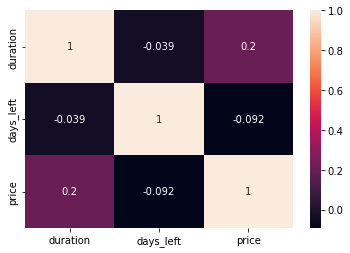

In [19]:
sns.heatmap(data.corr(),annot=True)

C:\Users\91777\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='count'>

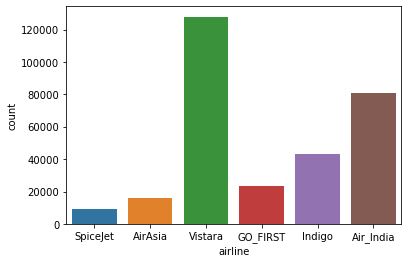

In [20]:
sns.countplot(data['airline'])

C:\Users\91777\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='departure_time', ylabel='count'>

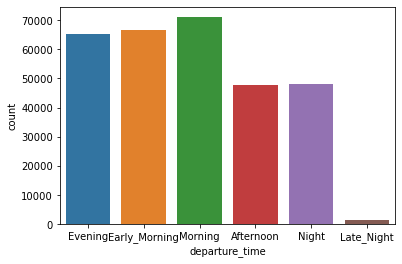

In [21]:
sns.countplot(data['departure_time'])

<AxesSubplot:xlabel='departure_time', ylabel='price'>

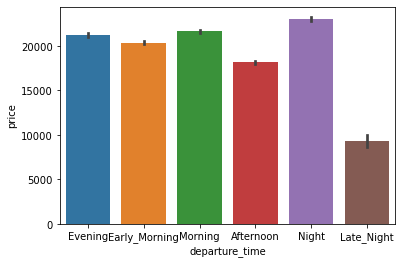

In [22]:
sns.barplot(x = data['departure_time'],y=data['price'])

<AxesSubplot:xlabel='duration', ylabel='price'>

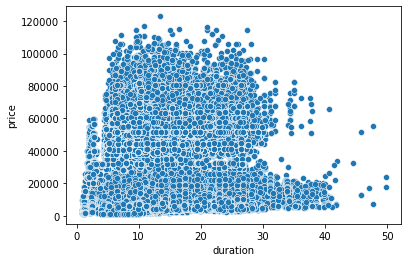

In [23]:
sns.scatterplot(x = data['duration'],y=data['price'])

C:\Users\91777\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

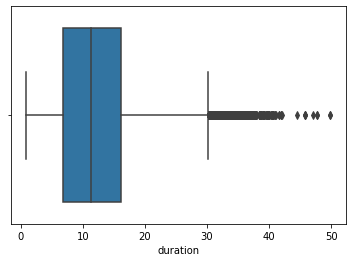

In [24]:
sns.boxplot(data['duration'])

C:\Users\91777\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_left'>

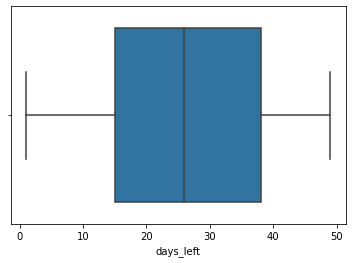

In [25]:
sns.boxplot(data['days_left'])

C:\Users\91777\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

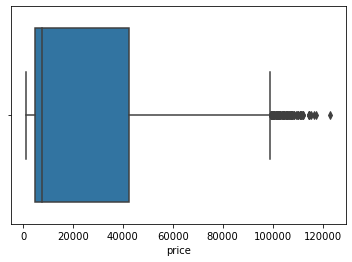

In [26]:
sns.boxplot(data['price'])

In [27]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [28]:
#  IQR price
42521-4783

37738

In [29]:
42521+(1.5*37738)

99128.0

In [30]:
4789-(1.5*37738)

-51818.0

In [31]:
dff['price'] = np.where(dff['price'] > 99128,
                         0,
                         dff['price'])

In [32]:
# iqr duration
iqr = dff['duration'].quantile(0.75) - dff['duration'].quantile(0.25)
iqr

9.340000000000002

In [33]:
16.17+(1.5*iqr)

30.180000000000003

In [34]:
6.83-(1.5*iqr)

-7.1800000000000015

In [35]:
dff['duration'] = np.where(dff['duration'] > 30,
                         0,
                         dff['duration'])

In [36]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [37]:
dff['price'] = dff['price'].replace(0,np.nan)


In [38]:
dff['duration'] = dff['duration'].replace(0,np.nan)

In [39]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          297927 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300030 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 27.5+ MB


In [40]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=5)

In [41]:
ff = impute.fit_transform(dff[['duration','days_left','price']])

In [42]:
filled = pd.DataFrame(ff,columns=['durations','days_lefts','prices'])

In [43]:
filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   durations   300153 non-null  float64
 1   days_lefts  300153 non-null  float64
 2   prices      300153 non-null  float64
dtypes: float64(3)
memory usage: 6.9 MB


In [44]:
dataf = pd.concat([dff,filled],axis=1)

In [45]:
dataf.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,durations,days_lefts,prices
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0,2.33,1.0,5955.0


In [46]:
dataf = dataf.drop(columns=['Unnamed: 0','duration','days_left','price'])

In [47]:
dataf.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,durations,days_lefts,prices
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


C:\Users\91777\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='durations'>

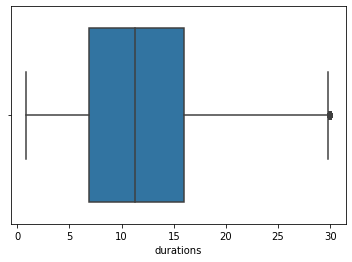

In [48]:
sns.boxplot(dataf['durations'])

C:\Users\91777\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prices'>

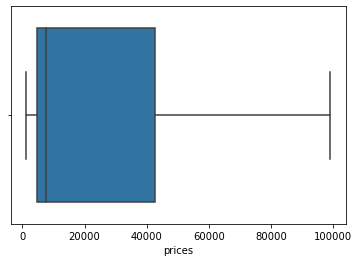

In [49]:
sns.boxplot(dataf['prices'])

In [50]:
# from sklearn.preprocessing import FunctionTransformer

In [51]:
# sns.kdeplot(data['price'].map(lambda X :1/X))

In [52]:
# from sklearn.preprocessing import PowerTransformer

In [53]:
# sns.kdeplot(data['price'].map(PowerTransformer())

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = data.drop(columns='price')
y = data['price'].values.reshape(-1,1)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [57]:
X.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,SpiceJet,others,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,SpiceJet,others,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,AirAsia,others,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import KNNImputer

In [60]:
cols_ohe = ['airline','flight','source_city','destination_city']
ohe = OneHotEncoder()
ohe.fit(X[cols_ohe])

OneHotEncoder()

In [61]:
ord_cols = ['departure_time','stops','class','arrival_time']
ord = OrdinalEncoder(categories = [['Late_Night','Afternoon','Night','Evening','Early_Morning','Morning'],
                                   ['two_or_more','one','zero'],
                                   ['Economy','Business'],
                                   ['Late_Night','Afternoon','Night','Evening','Early_Morning','Morning']])

In [62]:
ord.fit(X_train[ord_cols])

OrdinalEncoder(categories=[['Late_Night', 'Afternoon', 'Night', 'Evening',
                            'Early_Morning', 'Morning'],
                           ['two_or_more', 'one', 'zero'],
                           ['Economy', 'Business'],
                           ['Late_Night', 'Afternoon', 'Night', 'Evening',
                            'Early_Morning', 'Morning']])

In [63]:
ord.categories_

[array(['Late_Night', 'Afternoon', 'Night', 'Evening', 'Early_Morning',
        'Morning'], dtype=object),
 array(['two_or_more', 'one', 'zero'], dtype=object),
 array(['Economy', 'Business'], dtype=object),
 array(['Late_Night', 'Afternoon', 'Night', 'Evening', 'Early_Morning',
        'Morning'], dtype=object)]

In [64]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,others,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,others,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,others,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [375]:
transformer =ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(categories=ohe.categories_,sparse=False,drop='first'),[0,1,2,6]),
    ('trf2',OrdinalEncoder(categories=ord.categories_),[3,4,7,5]),
    ('scale',StandardScaler(),['duration'])

],remainder='passthrough')

In [376]:
X_trans_train=transformer.fit_transform(X_train)

In [377]:
X_trans_test=transformer.transform(X_test)

In [378]:
lr = LinearRegression()

In [379]:
lr.fit(X_trans_train,y_train)

LinearRegression()

In [380]:
y_pred=lr.predict(X_trans_test)
y_train_pred = lr.predict(X_trans_train)

In [381]:
y_pred.reshape(-1,1)

array([[ 9363.65653726],
       [55468.86759991],
       [ 2802.44693327],
       ...,
       [ 8935.80661773],
       [ 5904.81251218],
       [ 2666.53715027]])

In [382]:
y_test.shape

(60031, 1)

In [383]:
y_pred.shape

(60031, 1)

In [384]:
r2_score(y_test,y_pred)

0.9202470202489527

In [385]:
r2_score(y_train,y_train_pred)

0.9201477779245405

In [386]:
folds = KFold(n_splits=10 , shuffle =True, random_state = 0)
scores = cross_val_score(lr,X_trans_train, y_train, scoring='r2', cv=folds).mean()
scores

0.9200023217973049

In [387]:
dataf.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,durations,days_lefts,prices
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


C:\Users\91777\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prices'>

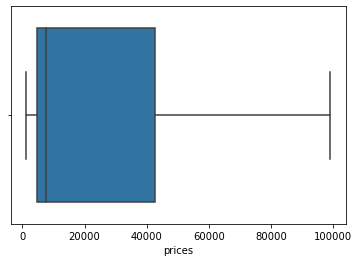

In [388]:
sns.boxplot(dataf['prices'])

C:\Users\91777\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='durations'>

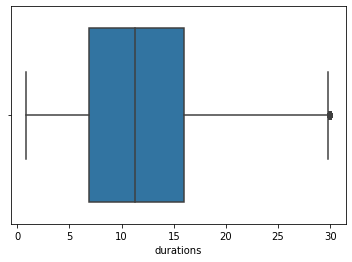

In [389]:
sns.boxplot(dataf['durations'])

In [395]:
repf = dataf['flight'].value_counts()[dataf['flight'].value_counts() < 500].index

In [396]:
dataf['flight'] = dataf['flight'].replace(repf,'others')

In [412]:
Xf = dataf.drop(columns='prices')
yf = dataf['prices']

In [413]:
Xf_train,Xf_test,yf_train,yf_test=train_test_split(Xf,yf,test_size=0.2,random_state=0)

In [414]:
Xf_train.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,durations,days_lefts
8891,Vistara,others,Delhi,Afternoon,one,Morning,Mumbai,Economy,19.25,44.0
273375,Vistara,UK-720,Kolkata,Early_Morning,one,Night,Chennai,Business,15.58,19.0
229182,Vistara,UK-940,Mumbai,Evening,zero,Night,Delhi,Business,2.17,42.0
38568,GO_FIRST,others,Delhi,Late_Night,one,Early_Morning,Chennai,Economy,5.67,23.0
218311,Air_India,AI-429,Delhi,Morning,one,Morning,Kolkata,Business,23.75,38.0


In [415]:
ohef_col = ['airline','flight','source_city','destination_city']
ohef = OneHotEncoder()

In [416]:
ohef.fit(Xf[ohef_col])

OneHotEncoder()

In [417]:
ordi_col = ['departure_time','stops','class','arrival_time']
ordf = OrdinalEncoder(categories=[['Late_Night','Afternoon','Night','Evening','Early_Morning','Morning'],
                                   ['two_or_more','one','zero'],
                                   ['Economy','Business'],
                                   ['Late_Night','Afternoon','Night','Evening','Early_Morning','Morning']])

In [418]:
ordf.fit(Xf[ordi_col])

OrdinalEncoder(categories=[['Late_Night', 'Afternoon', 'Night', 'Evening',
                            'Early_Morning', 'Morning'],
                           ['two_or_more', 'one', 'zero'],
                           ['Economy', 'Business'],
                           ['Late_Night', 'Afternoon', 'Night', 'Evening',
                            'Early_Morning', 'Morning']])

In [419]:

transformerf = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(categories=ohef.categories_,sparse=False,drop='first'),[0,1,2,6]),
    ('trf2',OrdinalEncoder(categories=ordf.categories_),[3,4,7,5]),
    ('scale',StandardScaler(),['durations'])
],remainder='passthrough')

In [420]:
Xf_trans_train = transformerf.fit_transform(Xf_train)

In [421]:
Xf_trans_test = transformerf.transform(Xf_test)

In [422]:
lrf = LinearRegression()

In [423]:
lrf.fit(Xf_trans_train,yf_train)

LinearRegression()

In [424]:
yf_pred_test = lrf.predict(Xf_trans_test)

In [425]:
yf_pred_test

array([ 9215.68405113, 55373.58440136,  2954.36509096, ...,
        9035.48097192,  5916.69382303,  2638.75594766])

In [426]:
r2_score(yf_test,yf_pred_test)

0.920098275901042

In [428]:
yf_pred_train = lrf.predict(Xf_trans_train)

In [429]:
r2_score(yf_train,yf_pred_train)

0.9200255727055816

In [430]:
folds = KFold(n_splits=10 , shuffle =True, random_state = 0)
scores = cross_val_score(lrf,Xf_trans_train, yf_train, scoring='r2', cv=folds).mean()
scores

0.9198768389961754